In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import math
import numpy as np

Original Image


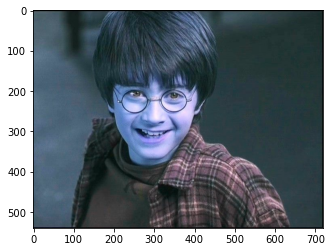

In [35]:
inp = cv.imread("hp1.jpg")
print("Original Image")
plt.imshow(inp)

# Step 1: Convert into Grayscale 

True

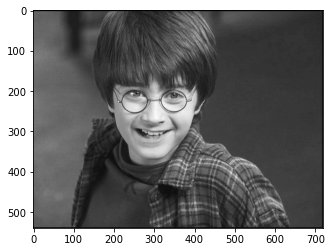

In [36]:
b, g, r = cv.split(inp)
imgGray = 0.2989 * r + 0.5870 * g + 0.1140 * b
plt.imshow(imgGray, cmap='gray')
cv.imwrite("hp1_gray.jpg", imgGray)

# Step 2: Convert to Binary Image

True

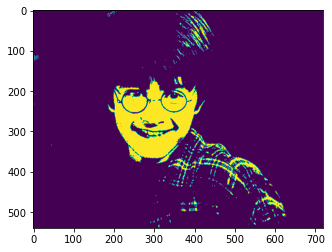

In [38]:
imgBinary = cv.threshold(imgGray, 127, 255, cv.THRESH_BINARY)[1]
plt.imshow(imgBinary)
cv.imwrite("hp1_binary.jpg", imgBinary)

# Step 3: Unique Label Assignment

After assigning unique labels


True

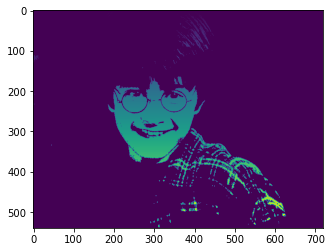

In [39]:
[row, col] = imgBinary.shape
iter1 = imgBinary #Array consisting of unique labels
one = 255 #Intensity of white pixel
zero = 0 #Intensity of black pixel
label = int(1) #Variable for assigning unique label
for i in range(row):
    for j in range(col):
        if imgBinary[i][j] == one:
            iter1[i][j] = label
        label = label + 1
            
print("After assigning unique labels")
plt.imshow(iter1)
cv.imwrite("hp1_label.jpg", iter1)

# Step 4: Top Down Parsing

After top down parsing


True

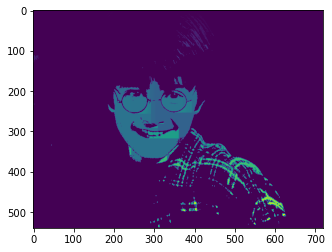

In [40]:
iter2 = iter1
[row, col] = iter1.shape
for i in range(row):
    for j in range(col):
        if iter2[i][j] != zero:
            if i == 0 and j > 0 and iter2[i][j] != zero:
                iter2[i][j] = iter2[i][j-1]
            elif i > 0 and j == 0 and iter2[i-1][j] != zero:
                iter2[i][j] = iter2[i-1][j]
            elif i > 0 and j > 0:
                if iter2[i-1][j] != zero and iter2[i][j-1] != zero:
                    iter2[i][j] = min(iter2[i-1][j], iter2[i][j-1])
                elif iter2[i-1][j] == zero and iter2[i][j-1] != zero:
                    iter2[i][j] = iter2[i][j-1]
                elif iter2[i-1][j] != zero and iter2[i][j-1] == zero:
                    iter2[i][j] = iter2[i-1][j]
print("After top down parsing")
plt.imshow(iter2)
cv.imwrite("hp1_top_down.jpg", iter2)

# Step 5: Bottom Up Parsing

After bottom up parsing


True

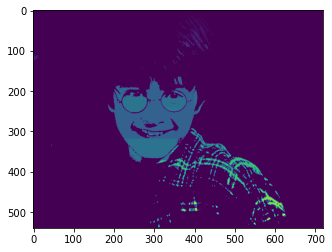

In [41]:
iter3 = iter2
[row, col] = iter3.shape
for i in reversed(range(row)):
    for j in reversed(range(col)):
        if iter3[i][j] != zero:
            if i == (row-1) and j < (col-1) and iter3[i][j+1] != zero:
                iter3[i][j] = iter3[i][j+1]
            elif i < (row-1) and j == (col-1) and iter3[i+1][j] != zero:
                iter3[i][j] = iter3[i+1][j]
            elif i < (row-1) and j < (col-1):
                if iter3[i+1][j] != zero and iter3[i][j+1] != zero:
                    iter3[i][j] = min(iter3[i+1][j], iter3[i][j+1])
                elif iter3[i+1][j] == zero and iter3[i][j+1] != zero:
                    iter3[i][j] = iter3[i][j+1]
                elif iter3[i+1][j] != zero and iter3[i][j+1] == zero:
                    iter3[i][j] = iter3[i+1][j]
print("After bottom up parsing")
plt.imshow(iter3)
cv.imwrite("hp1_bottom_up.jpg", iter3)